### Libraries for dataset manipulation and visulization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
dataset = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Extracted Features\\Formula_Index_with_pH_value.csv')

### Preprocessing on dataset

In [3]:
X = np.array(dataset['Formula_Index'])
Y = np.array(dataset['pH_Value'])
print(X)
print(Y)

[525.  505.  542.  ... 397.  262.5 365. ]
[7.9 7.9 7.9 ... 7.7 7.7 7.7]


In [4]:
X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)
print(X,Y)

[[525. ]
 [505. ]
 [542. ]
 ...
 [397. ]
 [262.5]
 [365. ]] [[7.9]
 [7.9]
 [7.9]
 ...
 [7.7]
 [7.7]
 [7.7]]


### DTR model training

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y)

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

### Prediction 

In [7]:
prediction = regressor.predict([[500]])
print(prediction)

[7.93333333]


In [8]:
pred = regressor.predict(X_val)
print(pred)

[7.4        7.68       7.76666667 7.7875     7.8        7.79333333
 7.76666667 7.9        7.9        7.7        7.7        7.85
 7.8        7.7875     7.76666667 7.8        7.7        8.1
 8.         7.79333333 7.91666667 7.85       7.875      7.7
 7.9        7.7        7.3        8.1        7.8        8.
 7.7875     7.71428571 7.9        7.825      7.84285714 7.7
 8.075      7.85       7.7875     7.76666667 7.7875     7.9
 7.7        7.6        7.8        7.84285714 7.83333333 7.86666667
 7.9        7.83333333 7.74285714 7.74       7.9        7.7
 7.87142857 7.74       7.9        7.8        7.58       7.7875
 8.         7.9        7.71428571 7.76666667 7.63333333 7.85
 7.86666667 7.7        7.7        7.6        7.9625     7.975
 8.         7.8        7.68       7.91666667 7.675      7.76666667
 7.91666667 7.875      7.71666667 7.8        7.83333333 7.8
 7.65       7.9625     7.74285714 7.7        8.         7.9
 7.58       7.8        7.925      7.86666667 7.875      7.77142857
 7.9  

In [9]:
# mse , mae and r2_score values
mae_value = mean_absolute_error(y_val, pred)
mse_value = mean_squared_error(y_val, pred)
r2_score_value = r2_score(y_val, pred)
# Total error with mse , mae and r2_score
print(f"MSE {mse_value}")
print(f"MAE {mae_value}")
print(f"r2_score {r2_score_value}")

MSE 0.0505982585550232
MAE 0.17935791860603884
r2_score -0.5216467112883474


### Visulization

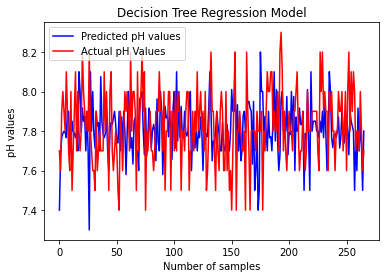

In [10]:
plt.plot(pred,color = 'Blue')
plt.plot(y_val, color = 'red')
plt.title("Decision Tree Regression Model")
plt.legend(['Predicted pH values', 'Actual pH Values'], loc='upper left')
plt.xlabel('Number of samples')
plt.ylabel('pH values')
plt.savefig("DTRmodelForpHestimationUsingFormula.jpg")